In [53]:
import pandas as pd

df = pd.read_csv("Film_Dataset.csv")
df.head()


,Film_Name,Release_Date,Category,Language,Viewer_Rate,Number_of_Views,Viewing_Month
0,Chennai Express,9/12/2021,Romance,Hindi,4.5,36395,2022-09
1,Mountain Trail,4/27/2020,Comedy,English,3.5,93162,2021-07
2,Eternal Hope,7/4/2020,Romance,English,4.6,98663,2021-04
3,Seoul Heartbeat,4/17/2020,Comedy,English,4.1,112635,2020-07
4,Shadow Pact,2/24/2022,Documentary,English,4.3,29496,2023-05


In [54]:
df["Release_Date"] = pd.to_datetime(df["Release_Date"])
df["Viewing_Month"] = pd.to_datetime(df["Viewing_Month"])


In [55]:
df = df[df["Release_Date"].dt.year != 2026]
df = df[df["Viewing_Month"].dt.year != 2026]


In [56]:
df = df.drop_duplicates()



In [60]:
df['Unique_ID'] = (
    df['Film_Name'].astype(str) + "_" +
    df['Language'].astype(str) + "_" +
    df['Category'].astype(str) + "_" +
    df['Release_Date'].dt.strftime("%Y-%m-%d")
)


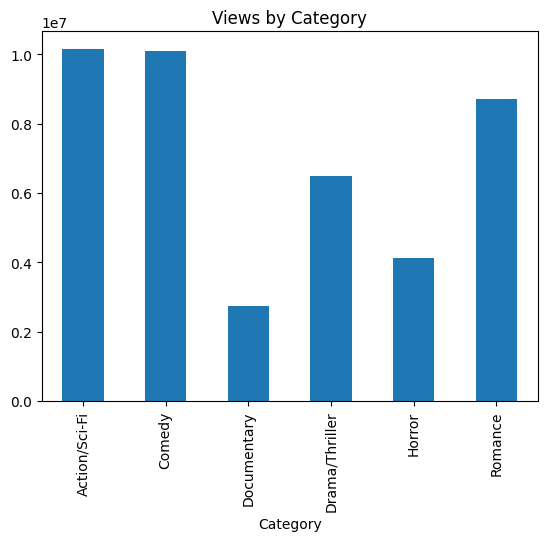

In [61]:
import matplotlib.pyplot as plt

df.groupby("Category")["Number_of_Views"].sum().plot(kind="bar")
plt.title("Views by Category")
plt.show()


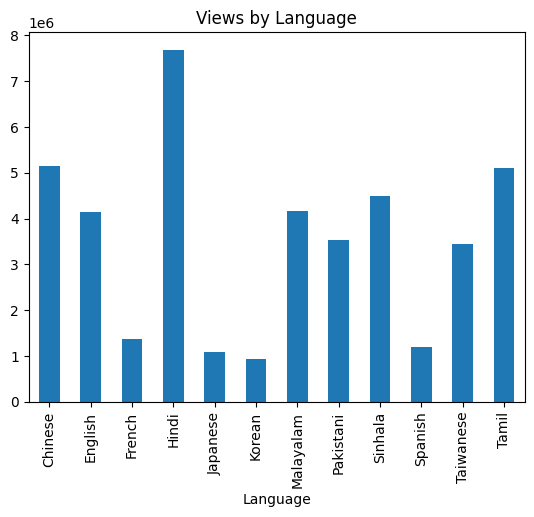

In [62]:
df.groupby("Language")["Number_of_Views"].sum().plot(kind="bar")
plt.title("Views by Language")
plt.show()


In [63]:
df['Popularity_Score'] = (
    df['Number_of_Views']*0.6 +
    df['Viewer_Rate']*0.4
)


In [64]:
df.to_csv("cleaned_film_data.csv", index=False)
print("Cleaned dataset saved successfully!")




Cleaned dataset saved successfully!
